# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Several changes has been in  the participation rates in both the SAT and ACT exams between
years 2017 and 2018 acros the 50 States of the United States. This report investigates to explore the reasons for the these changes within the United states categorized by states.
The report also aims to make recommendations to the College Board for strategies to improve participation rates in Ohio.

In [1]:
import os 
cwd = os.getcwd()
cwd
os.listdir('.')

['Untitled1.ipynb',
 'Untitled.ipynb',
 'combined_2017.csv',
 'Dereje_starter-code.ipynb',
 '.ipynb_checkpoints',
 'final.csv']

The objective of this project to give some recommnedations to improve the participations rate of students in college board exam in the United States.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [2]:
#Imports:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
# code 
df_sat=pd.read_csv("../data/sat_2017.csv")
df_act=pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#Code:
df_sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
df_act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [6]:
df_sat.columns, df_sat.size

(Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
        'Total'],
       dtype='object'),
 255)

In [7]:
df_act.columns, df_act.size

(Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
        'Composite'],
       dtype='object'),
 364)

Answer:
Sat_2017: consists of six variables such as sate,Participation , Evidence-Based Reading and Writing , math and Total
sat_2017 Dataset : the data is collcted from 255 record / observations
act_2017 Dataset : ACT scores are based on English, Math, Reading and Science.
Act_2017: consists of seven variables which are State, Participation, English, Math,	Reading,	Science and 	Composite

#### 4a. Does the data look complete? 

In [8]:
df_sat.isna().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [9]:
df_act.isna().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

Answer: According to the above result , both datasets have no null value . so we can conclude that the datasets are complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [10]:
df_sat[['State','Math','Participation']].min() 

State            Alabama
Math                  52
Participation        10%
dtype: object

In [11]:
df_sat[df_sat['Participation']=='2%']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
15,Iowa,2%,641,635,1275
24,Mississippi,2%,634,607,1242
34,North Dakota,2%,635,621,1256


In [12]:
df_sat['Participate']=list(map(lambda x:int(''.join(list(x)[0:len(list(x))-1])), df_sat.Participation))

In [13]:
df_sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Participate
0,Alabama,5%,593,572,1165,5
1,Alaska,38%,547,533,1080,38
2,Arizona,30%,563,553,1116,30
3,Arkansas,3%,614,594,1208,3
4,California,53%,531,524,1055,53


In [14]:
df_sat_new=df_sat[['State', 'Participation', 'Participate','Evidence-Based Reading and Writing', 'Math',
       'Total']]

In [15]:
df_sat_new[['Participate','Math']].min()

Participate     2
Math           52
dtype: int64

In [16]:
df_sat_new[df_sat_new['Participate']==2]

,State,Participation,Participate,Evidence-Based Reading and Writing,Math,Total
15,Iowa,2%,2,641,635,1275
24,Mississippi,2%,2,634,607,1242
34,North Dakota,2%,2,635,621,1256


Answer:

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [17]:
#code

#### 5. What are your data types? 
Display the data types of each feature. 

In [18]:
# The datatype of Sat_2017
df_sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
Participate                            int64
dtype: object

In [19]:
# The datatype of act_2017 variables are 
df_act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:In ACT data set the composite score must be integer instead of float or object. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [20]:
def convert_percent_to_float(x):
    return float(x.strip('%'))/100
df_act['Participation'] = df_act['Participation'].map(convert_percent_to_float)
df_act

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


In [21]:
df_sat['Participation'] = df_sat['Participation'].map(convert_percent_to_float)
df_sat

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Participate
0,Alabama,0.05,593,572,1165,5
1,Alaska,0.38,547,533,1080,38
2,Arizona,0.30,563,553,1116,30
3,Arkansas,0.03,614,594,1208,3
4,California,0.53,531,524,1055,53
5,Colorado,0.11,606,595,1201,11
6,Connecticut,1.00,530,512,1041,100
7,Delaware,1.00,503,492,996,100
8,District of Columbia,1.00,482,468,950,100
9,Florida,0.83,520,497,1017,83


In [22]:
df_act['Composite'] == '20.2x'

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51     True
Name: Composite, dtype: bool

In [23]:
#calculating the composite score to replace the value with the error
df_act.iloc[51,6] = (df_act.iloc[51][2] + df_act.iloc[51][3] + df_act.iloc[51][4] + df_act.iloc[51][5])/4

df_act.iloc[[51]]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,1.0,19.4,19.8,20.8,20.6,20.15


In [24]:
df_act['Composite'] = df_act['Composite'].astype(float)

In [25]:
df_act.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [26]:
df_sat.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
Participate                             int64
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [27]:
#code

def convert_float(element):
    return pd.to_numeric(df_act.Composite, errors='ignore')

df_act.Composite=convert_float(df_act.Composite)

In [28]:
def convert_State_to_string(element):
    return list(map(str,element))
df_act['State']=convert_State_to_string(df_act.State)

In [29]:
df_act.Composite=pd.to_numeric(df_act.Composite, errors='ignore')

In [30]:
df_act.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

In [31]:
#code
df_act.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Display the data types again to confirm they are correct.

In [32]:
#Code:
df_sat.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
Participate                             int64
dtype: object

In [33]:
df_act.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [34]:
#code
df_sat.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total', 'Participate'],
      dtype='object')

In [35]:
df_sat.columns=list(map(lambda x:x.lower(), df_sat.columns))
df_sat.columns

Index(['state', 'participation', 'evidence-based reading and writing', 'math',
       'total', 'participate'],
      dtype='object')

In [36]:
#Test whether the columns are in lowercase
df_sat.head(2)

,state,participation,evidence-based reading and writing,math,total,participate
0,Alabama,0.05,593,572,1165,5
1,Alaska,0.38,547,533,1080,38


In [37]:
df_sat.columns=list(map(lambda col:col.replace(' ','_'), df_sat.columns))
df_sat.columns=list(map(lambda col:col.replace('-','_'), df_sat.columns))
df_sat.columns

Index(['state', 'participation', 'evidence_based_reading_and_writing', 'math',
       'total', 'participate'],
      dtype='object')

In [38]:
# test if the white space is removed and suffice by underscore 
df_sat.head(2)

,state,participation,evidence_based_reading_and_writing,math,total,participate
0,Alabama,0.05,593,572,1165,5
1,Alaska,0.38,547,533,1080,38


In [39]:
#code
df_act.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [40]:
df_act.columns=list(map(lambda x:x.lower(), df_act.columns))
df_act.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

In [41]:
#Test whether the columns are in lowercase
df_act.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

In [42]:
df_act.columns=list(map(lambda col:col.replace(' ','_'), df_act.columns))
df_act.columns=list(map(lambda col:col.replace('-','_'), df_act.columns))
df_act.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

In [43]:
# test if the white space is removed and suffice by underscore 
df_act.head(2)

,state,participation,english,math,reading,science,composite
0,National,0.6,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.0,18.9,18.4,19.7,19.4,19.2


In [44]:
# test whether the columns are unique 
if list(df_sat.columns) == list(df_sat.columns.unique()):
    print(" The columns in sat 2017 dataset are Unique ")
    cols=[print(col) for col in df_sat.columns.unique()]
else:
    
    print("The columns in sat 2017 datset are not unique so here is the unique columns  ")
    Unique_Col=[print(col) for col in df_sat.columns.unique()]

 The columns in sat 2017 dataset are Unique 
state
participation
evidence_based_reading_and_writing
math
total
participate


In [45]:
# test whether the columns are unique 
if list(df_act.columns) == list(df_act.columns.unique()):
    print(" The columns in act 2017 dataset are Unique ")
    cols=[print(col) for col in df_act.columns.unique()]
else:
    
    print("The columns in act 2017 datset are not unique so here is the unique columns  ")
    Unique_Col=[print(col) for col in df_act.columns.unique()]

 The columns in act 2017 dataset are Unique 
state
participation
english
math
reading
science
composite


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


In [46]:
#The new dataframe SAT
new_df=pd.DataFrame(columns=['Feature','Type','Dataset' , 'Description'])
new_df=new_df.append({'Feature':'state','Type':df_sat['state'].dtypes,'Dataset':'SAT','Description':'This is the state columns from SAT dataset'} , ignore_index=True)
for col_name in df_sat.columns:
    new_df=new_df.append({'Feature':col_name,'Type':df_sat[col_name].dtypes,'Dataset':'SAT','Description':'This is the '+ col_name +  ' from SAT dataset'} , ignore_index=True)
new_df

,Feature,Type,Dataset,Description
0,state,object,SAT,This is the state columns from SAT dataset
1,state,object,SAT,This is the state from SAT dataset
2,participation,float64,SAT,This is the participation from SAT dataset
3,evidence_based_reading_and_writing,int64,SAT,This is the evidence_based_reading_and_writing...
4,math,int64,SAT,This is the math from SAT dataset
5,total,int64,SAT,This is the total from SAT dataset
6,participate,int64,SAT,This is the participate from SAT dataset


In [47]:
# The new datafram of ACT
new_df2=pd.DataFrame(columns=['Feature','Type','Dataset' , 'Description'])
new_df=new_df.append({'Feature':'state','Type':df_act['state'].dtypes,'Dataset':'SAT','Description':'This is the state columns from SAT dataset'} , ignore_index=True)
for col_name in df_act.columns:
    new_df2=new_df2.append({'Feature':col_name,'Type':df_act[col_name].dtypes,'Dataset':'ACT','Description':'This is the '+ col_name +  ' from ACT dataset'} , ignore_index=True)
new_df2

,Feature,Type,Dataset,Description
0,state,object,ACT,This is the state from ACT dataset
1,participation,float64,ACT,This is the participation from ACT dataset
2,english,float64,ACT,This is the english from ACT dataset
3,math,float64,ACT,This is the math from ACT dataset
4,reading,float64,ACT,This is the reading from ACT dataset
5,science,float64,ACT,This is the science from ACT dataset
6,composite,float64,ACT,This is the composite from ACT dataset


In [48]:
# merging the two dataset

merged_df=new_df.append(new_df2).reset_index()
del merged_df['index']
merged_df

,Feature,Type,Dataset,Description
0,state,object,SAT,This is the state columns from SAT dataset
1,state,object,SAT,This is the state from SAT dataset
2,participation,float64,SAT,This is the participation from SAT dataset
3,evidence_based_reading_and_writing,int64,SAT,This is the evidence_based_reading_and_writing...
4,math,int64,SAT,This is the math from SAT dataset
5,total,int64,SAT,This is the total from SAT dataset
6,participate,int64,SAT,This is the participate from SAT dataset
7,state,object,SAT,This is the state columns from SAT dataset
8,state,object,ACT,This is the state from ACT dataset
9,participation,float64,ACT,This is the participation from ACT dataset


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [49]:
#code
merged_df.drop([0] , inplace=True)

In [50]:
merged_df.set_index('Feature')

,Type,Dataset,Description
Feature,,,
state,object,SAT,This is the state from SAT dataset
participation,float64,SAT,This is the participation from SAT dataset
evidence_based_reading_and_writing,int64,SAT,This is the evidence_based_reading_and_writing...
math,int64,SAT,This is the math from SAT dataset
total,int64,SAT,This is the total from SAT dataset
participate,int64,SAT,This is the participate from SAT dataset
state,object,SAT,This is the state columns from SAT dataset
state,object,ACT,This is the state from ACT dataset
participation,float64,ACT,This is the participation from ACT dataset


In [51]:
merged_df

,Feature,Type,Dataset,Description
1,state,object,SAT,This is the state from SAT dataset
2,participation,float64,SAT,This is the participation from SAT dataset
3,evidence_based_reading_and_writing,int64,SAT,This is the evidence_based_reading_and_writing...
4,math,int64,SAT,This is the math from SAT dataset
5,total,int64,SAT,This is the total from SAT dataset
6,participate,int64,SAT,This is the participate from SAT dataset
7,state,object,SAT,This is the state columns from SAT dataset
8,state,object,ACT,This is the state from ACT dataset
9,participation,float64,ACT,This is the participation from ACT dataset
10,english,float64,ACT,This is the english from ACT dataset


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [52]:
# This is the join dataset of ACT 2017 and SAT 2017 in a new variable
df_act.columns=list(map(lambda col:col.lower(),df_act.columns))

In [53]:
df_act.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

In [54]:
df_act.dtypes, df_sat.dtypes

(state             object
 participation    float64
 english          float64
 math             float64
 reading          float64
 science          float64
 composite        float64
 dtype: object,
 state                                  object
 participation                         float64
 evidence_based_reading_and_writing      int64
 math                                    int64
 total                                   int64
 participate                             int64
 dtype: object)

In [55]:
#Code:

combined=pd.merge(df_sat,df_act, on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [56]:
#code
combined.to_csv('combined_2017.csv')

In [57]:
check_df=pd.read_csv('./combined_2017.csv')
#del check_df['Unnamed: 0']
#check_df.set_index()

In [58]:
df_act.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

In [59]:
df_act.dtypes, df_sat.dtypes

(state             object
 participation    float64
 english          float64
 math             float64
 reading          float64
 science          float64
 composite        float64
 dtype: object,
 state                                  object
 participation                         float64
 evidence_based_reading_and_writing      int64
 math                                    int64
 total                                   int64
 participate                             int64
 dtype: object)

In [60]:
#Code:

combined=pd.merge(df_sat,df_act, on='state')

In [61]:
#code
combined.to_csv('combined_2017.csv')

In [62]:
check_df=pd.read_csv('./combined_2017.csv')
#del check_df['Unnamed: 0']
#check_df.set_index()

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [63]:
df_sat_2018=pd.read_csv('../data/sat_2018.csv')
df_act_2018=pd.read_csv('../data/act_2018.csv')

In [64]:
df_sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [65]:
#def convert_float_2(x):
#    return float(x.strip('%'))/100
#sat_2018['Participation']= sat_2018['Participation'].map(convert_float_2)
#sat_2018

In [66]:
df_act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [67]:
df_act_2018['Participation']=list(map(lambda value:float(value.strip('%'))/100, df_act_2018['Participation']))

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [68]:
combined.head()

,state,participation_x,evidence_based_reading_and_writing,math_x,total,participate,participation_y,english,math_y,reading,science,composite
0,Alabama,0.05,593,572,1165,5,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,38,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,30,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,3,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,53,0.31,22.5,22.7,23.1,22.2,22.8


In [69]:
df_sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [70]:
df_act_2018.head()

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [71]:
combined_2018=pd.merge(df_sat_2018,df_act_2018, on='State')
combined_2018.head()

,State,Participation_x,Evidence-Based Reading and Writing,Math,Total,Participation_y,Composite
0,Alabama,6%,595,571,1166,1.00,19.1
1,Alaska,43%,562,544,1106,0.33,20.8
2,Arizona,29%,577,572,1149,0.66,19.2
3,Arkansas,5%,592,576,1169,1.00,19.4
4,California,60%,540,536,1076,0.27,22.7


In [72]:
combined_2018.columns=list(map(lambda col:col.lower(), combined_2018.columns))
combined_2018.head()

,state,participation_x,evidence-based reading and writing,math,total,participation_y,composite
0,Alabama,6%,595,571,1166,1.00,19.1
1,Alaska,43%,562,544,1106,0.33,20.8
2,Arizona,29%,577,572,1149,0.66,19.2
3,Arkansas,5%,592,576,1169,1.00,19.4
4,California,60%,540,536,1076,0.27,22.7


In [73]:
final=pd.merge(combined,combined_2018, on ='state')
final.head()

,state,participation_x_x,evidence_based_reading_and_writing,math_x,total_x,participate,participation_y_x,english,math_y,reading,science,composite_x,participation_x_y,evidence-based reading and writing,math,total_y,participation_y_y,composite_y
0,Alabama,0.05,593,572,1165,5,1.00,18.9,18.4,19.7,19.4,19.2,6%,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,38,0.65,18.7,19.8,20.4,19.9,19.8,43%,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,30,0.62,18.6,19.8,20.1,19.8,19.7,29%,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,3,1.00,18.9,19.0,19.7,19.5,19.4,5%,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,53,0.31,22.5,22.7,23.1,22.2,22.8,60%,540,536,1076,0.27,22.7


In [74]:
final.to_csv('final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [75]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_x_x,51.0,0.397059,0.351126,0.02,0.04,0.38,0.66,1.0
evidence_based_reading_and_writing,51.0,569.725490,44.679784,503.00,533.50,559.00,613.00,644.0
math_x,51.0,548.235294,84.437335,52.00,522.00,548.00,599.00,651.0
total_x,51.0,1127.313725,90.520382,996.00,1055.50,1107.00,1212.00,1295.0
participate,51.0,39.705882,35.112559,2.00,4.00,38.00,66.00,100.0
participation_y_x,51.0,0.647843,0.328063,0.08,0.31,0.69,1.00,1.0
english,51.0,20.927451,2.347942,16.30,19.00,20.70,23.30,25.5
math_y,51.0,21.192157,1.994878,18.00,19.40,20.90,23.10,25.3
reading,51.0,22.011765,2.064524,18.10,20.45,21.80,24.15,26.0
science,51.0,21.045098,3.185675,2.30,19.90,21.30,22.75,24.9


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [76]:
# Here is the code to calculate the standard deviation a given data set
import math
def standard_dev(df_col):
    if df_col.dtypes ==  'object' :
        pass
    else :
        
        n=len(df_col)
        mean=sum(df_col)/n
        sum_of=0
        for element in df_col:
            sum_of=sum_of + (element - mean)**2
        return math.sqrt(sum_of/n)

In [77]:
# test the standard function 

standard_dev(final['evidence_based_reading_and_writing'])

44.23957878011567

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [78]:
#Code:
df_colmn=list(final.columns)
std={col:standard_dev(final[col] ) for col in df_colmn}

In [79]:
std

{'state': None,
 'participation_x_x': 0.34766613530488066,
 'evidence_based_reading_and_writing': 44.23957878011567,
 'math_x': 83.60541971251418,
 'total_x': 89.62853410235164,
 'participate': 34.76661353048807,
 'participation_y_x': 0.32483065709110037,
 'english': 2.324808946936057,
 'math_y': 1.9752233070336587,
 'reading': 2.0441832405895677,
 'science': 3.154288318196337,
 'composite_x': 2.004117733386279,
 'participation_x_y': None,
 'evidence-based reading and writing': 46.66211050422986,
 'math': 46.724399944493776,
 'total_y': 92.273268159942,
 'participation_y_y': 0.343069124889043,
 'composite_y': 2.099389340187203}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: Not exactly receiving the same value but the diffrence is very small.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [80]:
#code
final.head()

,state,participation_x_x,evidence_based_reading_and_writing,math_x,total_x,participate,participation_y_x,english,math_y,reading,science,composite_x,participation_x_y,evidence-based reading and writing,math,total_y,participation_y_y,composite_y
0,Alabama,0.05,593,572,1165,5,1.00,18.9,18.4,19.7,19.4,19.2,6%,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,38,0.65,18.7,19.8,20.4,19.9,19.8,43%,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,30,0.62,18.6,19.8,20.1,19.8,19.7,29%,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,3,1.00,18.9,19.0,19.7,19.5,19.4,5%,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,53,0.31,22.5,22.7,23.1,22.2,22.8,60%,540,536,1076,0.27,22.7


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

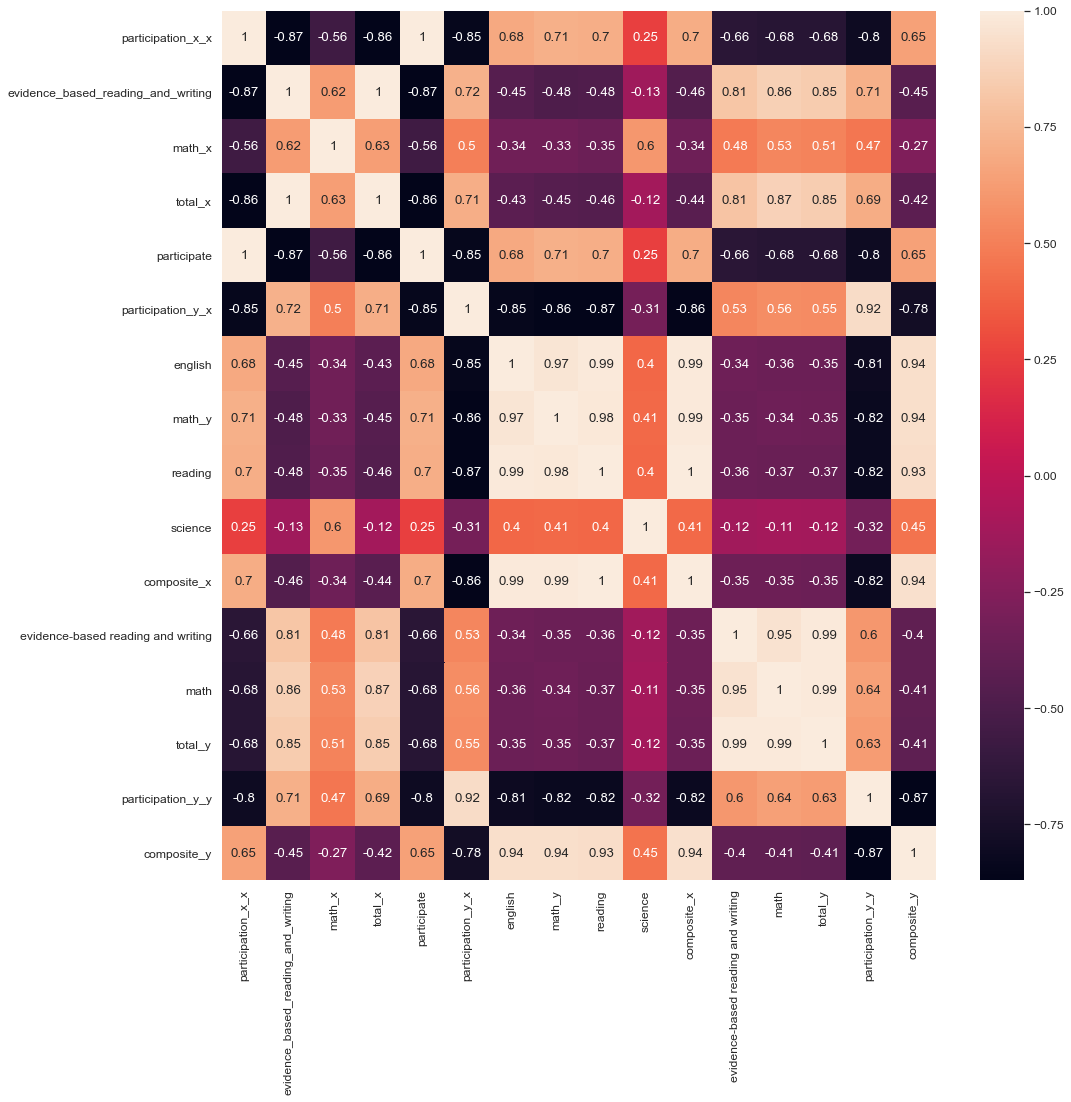

In [81]:
import seaborn as sns
sns.set(font_scale=1.1)

fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(final.corr(),annot=True);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

Plot and interpret histograms
For each of the following:
Participation rates for SAT & ACT
Math scores for SAT & ACT
Reading/verbal scores for SAT & ACT

In [82]:
df_sat.columns

Index(['state', 'participation', 'evidence_based_reading_and_writing', 'math',
       'total', 'participate'],
      dtype='object')

In [83]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,12)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i],fontsize=14)
        ax[i].set_xlabel(list_of_xlabels[i],fontsize=14)
        ax[i].set_ylabel('Number of States',fontsize=14)

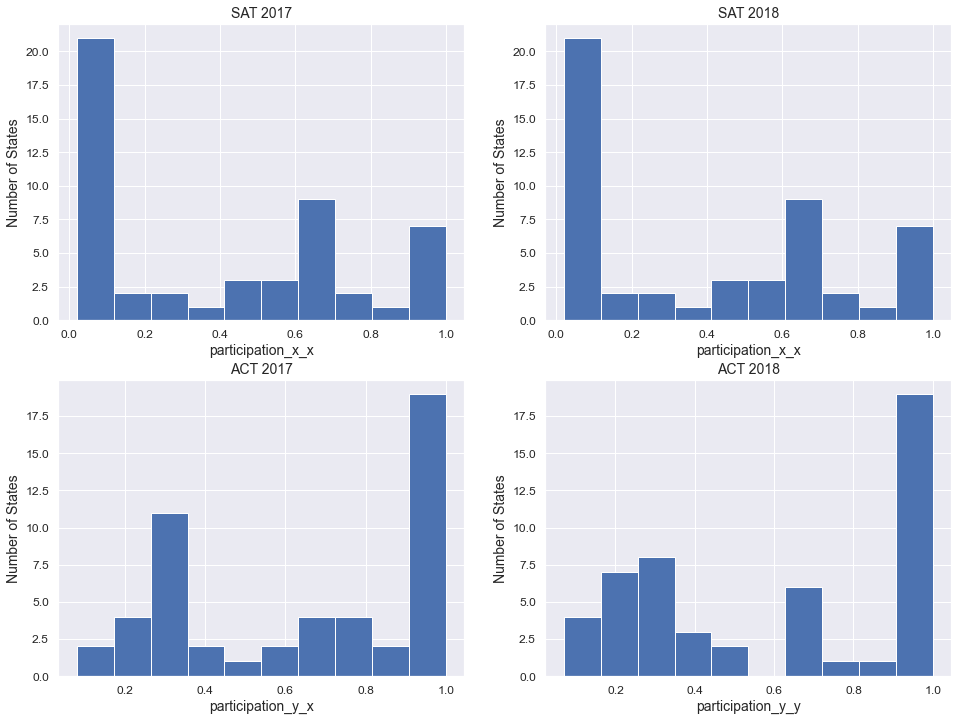

In [84]:
list_of_columns = ['participation_x_x', 'participation_x_x', 'participation_y_x','participation_y_y']
list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']

list_of_xlabels = [i for i in list_of_columns]  

subplot_histograms(final,list_of_columns,list_of_titles,list_of_xlabels)

In [85]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_x_x,51.0,0.397059,0.351126,0.02,0.04,0.38,0.66,1.0
evidence_based_reading_and_writing,51.0,569.725490,44.679784,503.00,533.50,559.00,613.00,644.0
math_x,51.0,548.235294,84.437335,52.00,522.00,548.00,599.00,651.0
total_x,51.0,1127.313725,90.520382,996.00,1055.50,1107.00,1212.00,1295.0
participate,51.0,39.705882,35.112559,2.00,4.00,38.00,66.00,100.0
participation_y_x,51.0,0.647843,0.328063,0.08,0.31,0.69,1.00,1.0
english,51.0,20.927451,2.347942,16.30,19.00,20.70,23.30,25.5
math_y,51.0,21.192157,1.994878,18.00,19.40,20.90,23.10,25.3
reading,51.0,22.011765,2.064524,18.10,20.45,21.80,24.15,26.0
science,51.0,21.045098,3.185675,2.30,19.90,21.30,22.75,24.9


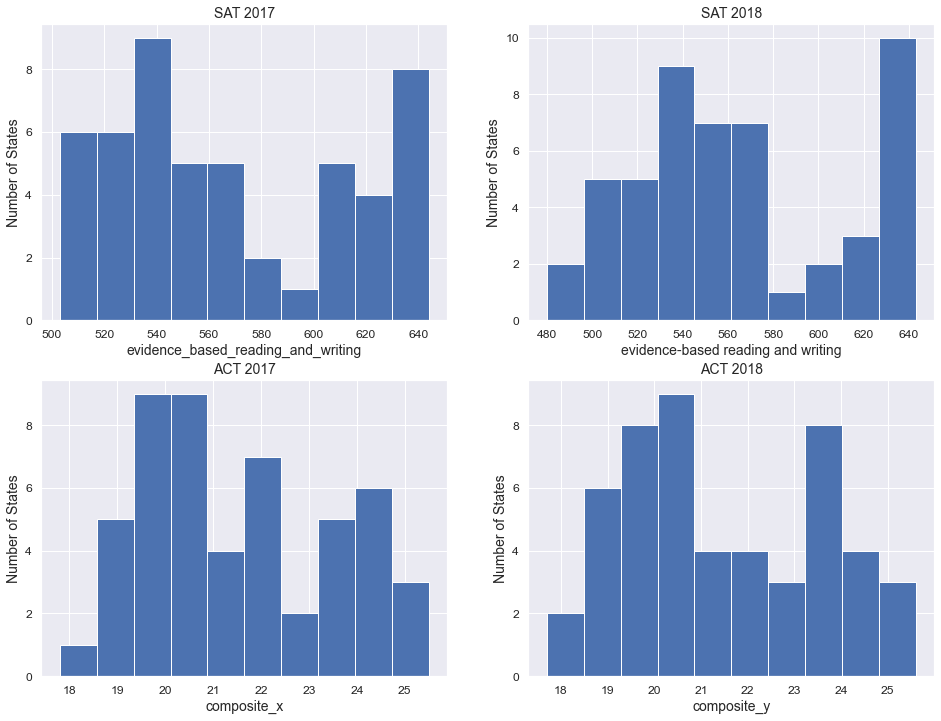

In [86]:
list_of_columns = ['evidence_based_reading_and_writing', 
                   'evidence-based reading and writing', 'composite_x','composite_y']
list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']

list_of_xlabels = [i for i in list_of_columns]  

subplot_histograms(final,list_of_columns,list_of_titles,list_of_xlabels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [88]:
# Code

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [89]:
len(df_sat['math']) ,len(df_act['math'])

(51, 52)

(450.0, 650.0)

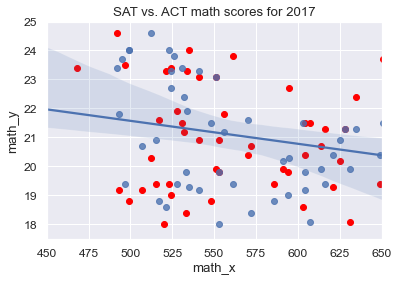

In [90]:
plt.scatter(df_sat['math'], df_act['math'][:len(df_act['math'])-1] , color="red")
plt.title("SAT vs. ACT math scores for 2017")
plt.xlabel("SAT MATH 2017")
plt.ylabel("SAT ACT 2017")
plt.grid(True)
sns.regplot(x='math_x', y='math_y', data=final)
plt.ylim(17.5,25)
plt.xlim(450,650)

In [91]:
df_sat.columns

Index(['state', 'participation', 'evidence_based_reading_and_writing', 'math',
       'total', 'participate'],
      dtype='object')

In [92]:
df_act.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

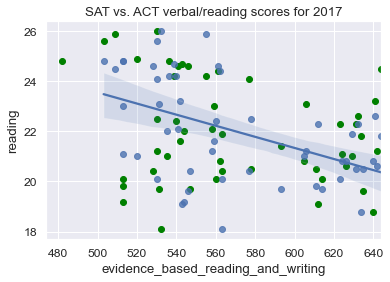

In [93]:
#SAT vs. ACT verbal/reading scores for 2017
plt.scatter(df_sat['evidence_based_reading_and_writing'], df_act['reading'][:len(df_act['math'])-1] , color="Green")
plt.title("SAT vs. ACT verbal/reading scores for 2017")
plt.xlabel("SAT evidence_based_reading_and_writing 2017")
plt.ylabel("SAT readingACT 2017")
plt.grid(True)
sns.regplot(x='evidence_based_reading_and_writing', y='reading', data=final);

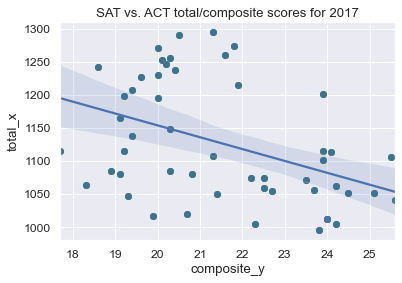

In [94]:
# Code
#SAT vs. ACT total/composite scores for 2017
plt.scatter(final['composite_y'],final['total_x'] [:len(df_act['math'])-1] , color="Green")
plt.title("SAT vs. ACT total/composite scores for 2017")
plt.xlabel("SAT total 2017")
plt.ylabel("SAT composite ACT 2017")
plt.grid(True)
sns.regplot(x='composite_y', y='total_x', data=final);

df_sat_2018.columns

df_sat.columns

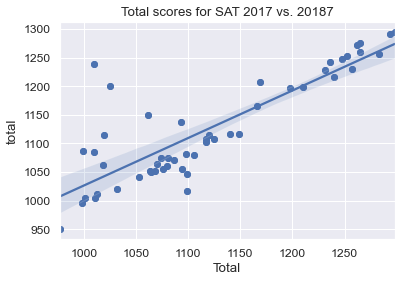

In [95]:
#Total scores for SAT 2017 vs. 2018
plt.scatter( df_sat_2018['Total'] ,df_sat['total'],)
plt.title("Total scores for SAT 2017 vs. 20187")
plt.xlabel("SAT total 2017")
plt.ylabel("SAT Total  2018")
#plt.grid(True)
sns.regplot(df_sat_2018['Total'] ,df_sat['total']);
#sns.regplot()

In [96]:
df_act_2018.columns

Index(['State', 'Participation', 'Composite'], dtype='object')

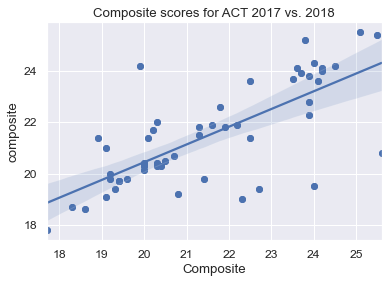

In [97]:
# Composite scores for ACT 2017 vs. 2018
plt.scatter( df_act_2018['Composite'] ,df_act['composite'] )
plt.title("Composite scores for ACT 2017 vs. 2018")
plt.xlabel("ACT Composite 2018")
plt.ylabel("ACT Composite  2017")
plt.grid(True)
sns.regplot(df_act_2018['Composite'] ,df_act['composite']);

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

-Retrieved March 25, 2020, fromhttps://reports.collegeboard.org/archive/sat-suite-program-results/2017/class-2017-results.
-Anna Aldric | Dec 1, 2019 9:00:00 PM, Retrieved March 25, 2020, from  https://blog.prepscholar.com/average-act-score-for-2015-2014-2013-and-earlier-years. 
-Retrieved March 25, 2020, from http://www.edweek.org/ew/articles/2018/10/31/sat-scores-rise-as-number-of-test-takers.html.
SAT School Day (High School),Retrieved March 26, 2020, from https://wvde.us/assessment/sat-school-day-high-school/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Between 2017 and 2018, 10 states (Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island, and West Virginia) and the District of Columbia covered the cost of the SAT for all their public school students. Three years ago, only three states and the District of Columbia did so. This, and the implementation of the SAT School Day contributed to the overall 25% increase in SAT test-takers. As such, the SAT School Day and the cost subsidy of the SAT can be seen to greatly improve SAT participation rates.
In West Virginia, the participation for SAT has doubled from 14% to 28% while ACT saw a decrease by 5%. This can be attributed to the education department's implementation of the SAT School Day where high school students can take the SAT tests on an allocated school day rather than taking in on a weekend and usually at a test center which they do not school at.

## Recommendations
The college board should explore working with both high schools and colleges. A college's admission criteria based on either of the tests' score would have an huge impact on the perceived value of the test. The value to colleges of a single type of test for the admissions criteria is that they have a single metric which they can rank their applicants by, rather than having to compare their over two sets of metrics. Colleges have also been observed to be moving away from standardized tests. This issue should also be addressed to prove the need for these tests in providing impartial information about their applicants.
Experience sharing and success stories between States can also be seen in states where the education department subsidzes the full costs of the test, making them more accessible to lower income students.

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [98]:
# Code: